#### **Ejercicio:** ¿Regresión logística, bosque aleatorio o KNN?

**Elaborado por:** Fabian Villarreal Sosa

Usaremos este conjunto de datos. Los datos, que fueron modificados a partir de esta fuente, contienen información sobre campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. **El objetivo es predecir si el cliente se suscribirá** (**sí: 1 o no: 0**) a un depósito a plazo (la columna de destino se llama 'y_yes' en este csv).

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Tu tarea es construir un modelo de regresión logística para predecir si un cliente se suscribirá o no. Ajusta los hiperparámetros para obtener el mejor modelo posible. Luego, calcula las siguientes métricas de clasificación:

**Métricas para calcular:**

* Precisión
* Sensibilidad
* Especificidad
* AUC, ROC

**Preguntas para pensar y responder**

Después de completar la tarea, responde las siguientes preguntas:

* ¿Qué métrica será la mejor para evaluar tu modelo de clasificación para este conjunto de datos y por qué? Sugerencia: piensa en lo que significa cada métrica en este escenario específico. ¿Qué métrica va a ayudar más al banco?
* Compara la precisión de tu modelo con el modelo de referencia. ¿Ves algún problema aquí?
* ¿De qué otras formas podrías mejorar este modelo?

In [173]:
# Librerias
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from google.colab import drive

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [174]:
# Acceder a directorio en Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
# Determinar directorio
os.chdir('/content/drive/MyDrive/Coding Dojo/Datos')
os.getcwd()

'/content/drive/MyDrive/Coding Dojo/Datos'

In [176]:
# Datos
df = pd.read_csv('bank_modified.csv')
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [177]:
df.shape

(4521, 26)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

In [179]:
# Valores perdidos
columnas_nans = df.columns[df.isna().any()]
columnas_nans

# No hay valores perdidos

Index([], dtype='object')

In [180]:
df.describe()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630,39.766645,0.542579,0.209246,0.037160,0.024773,0.214333,0.050874,0.040478,0.092236,0.018580,0.169874,0.028312,0.008405,0.618668,0.264543,0.510064,0.298607,0.041363,0.016810,0.566025,0.152842,0.115240
std,10.576211,3009.638142,259.856633,3.109807,100.121124,1.693562,0.406815,0.189174,0.155451,0.410404,0.219764,0.197099,0.289391,0.135051,0.375564,0.165882,0.091304,0.485767,0.441138,0.499954,0.457697,0.199149,0.128575,0.495676,0.359875,0.319347
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,69.000000,104.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,444.000000,185.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,49.000000,1480.000000,329.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [181]:
df['pdays'].value_counts()

-1      3705
 182      23
 183      20
 363      12
 92       12
        ... 
 118       1
 386       1
 63        1
 81        1
 234       1
Name: pdays, Length: 292, dtype: int64

In [182]:
# Se puede observar que existen 3,705 personas a las cuales no se les han llamado
# De esta forma, esta variable se utiliza para crear una dummy respecto a si se ha llamado a la persona o no
df['pdays2']=0
df.loc[df['pdays'] > 0, 'pdays2'] = 1

df['pdays2'].value_counts()

0    3705
1     816
Name: pdays2, dtype: int64

In [183]:
# Matriz de caracteristicas y variable dependiente
X_var = df.drop(['y_yes', 'pdays'], axis=1).columns
X = df.loc[:, X_var]

y = df.loc[:, 'y_yes'].values

print('X dimensions: ', X.shape)
print('y dimensions: ', y.shape)

X dimensions:  (4521, 25)
y dimensions:  (4521,)


In [184]:
# Dividir datos en conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    random_state = 2731,
                                                    stratify = y)

In [185]:
# Escalar los datos
scaler = StandardScaler()
# Ajustar con base en el conjunto de entrenamiento
scaler.fit(X_train)
# Aplicar la transformacion a los conjuntos de entrenamiento y de prueba
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Definir función para estimar modelos

In [186]:
# Definicion de funcion
def model_class(model, X_train, X_test, y_train, y_test, method):
  np.random.seed(2731) # seed

  # Estimation
  model.fit(X_train, y_train)
  
  # Prediction
  yhat_train = model.predict(X_train)
  yhat_test = model.predict(X_test)

  # Metrics
  DeterCoef_train = model.score(X_train, y_train)
  DeterCoef_test = model.score(X_test, y_test)

  roc_auc_score_train = metrics.roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
  roc_auc_score_test = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) 

  RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, yhat_train))
  RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, yhat_test))

  # Confusion matrix
  c_matrix_train = metrics.confusion_matrix(y_train, yhat_train)
  c_matrix_test = metrics.confusion_matrix(y_test, yhat_test) 

  TP_train =  c_matrix_train[1][1]
  TN_train =  c_matrix_train[0][0]
  FP_train =  c_matrix_train[0][1]
  FN_train =  c_matrix_train[1][0]  

  TP_test =  c_matrix_test[1][1]
  TN_test =  c_matrix_test[0][0]
  FP_test =  c_matrix_test[0][1]
  FN_test =  c_matrix_test[1][0]   

  sensitivity_train = (TP_train / float(TP_train + FN_train))
  sensitivity_test = (TP_test / float(TP_test + FN_test))  

  specificity_train =  (TN_train / float(TN_train + FP_train))
  specificity_test =  (TN_test / float(TN_test + FP_test))  

  # Results
  print(f'\nModel Report\n{method}\n')
  
  print(f'Determination Coefficient/Precision (Train): {DeterCoef_train:.4f}')
  print(f'Determination Coefficient/Precision (Test): {DeterCoef_test:.4f}')

  print('\n')

  print(f'RMSE (Train): {RMSE_train:.4f}')
  print(f'RMSE (Test): {RMSE_test:.4f}')

  print('\n')

  print(f'Sensitivity (Train): {sensitivity_train:.4f}')
  print(f'Sensitivity (Test): {sensitivity_test:.4f}')  
  print(f'Specificity (Train): {specificity_train:.4f}')
  print(f'Specificity (Test): {specificity_test:.4f}')    

  print('\n')

  print(f'AUC ROC (Train): {roc_auc_score_train:.4f}')
  print(f'AUC ROC (Test): {roc_auc_score_test:.4f}')

Se utiliza la funcion 'GridSearchCV' de scikit-learn para determinar la los valores u opciones para algunos parámetros.

In [187]:
np.random.seed(2731)

# List of values to test the parameter n_estimators
C_range = [1] + list(range(10, 1010, 10))
np.array(C_range)

# Modelo
log_regress = LogisticRegression(solver = 'liblinear', random_state = 2731)

# Parametros a evaluar en la funcion 'GridSearchCV'
parameters = {'C': C_range,
              'penalty': ['l1', 'l2']} 

# Determinacion y ejecucion del modelo
gridsearch_log_regress = GridSearchCV(log_regress, parameters, cv = 10);
gridsearch_log_regress.fit(X_train, y_train);

In [188]:
#Resultados
print(gridsearch_log_regress.best_params_)

C_opt=gridsearch_log_regress.best_params_['C']
penalty_opt=gridsearch_log_regress.best_params_['penalty']

{'C': 1, 'penalty': 'l1'}


In [189]:
# Lista de valores a probar para 'C'
scores = []
for c in C_range:
  log_regress = LogisticRegression(C = c, penalty = 'l1', solver = 'liblinear', random_state = 2731)
  log_regress.fit(X_train, y_train)
  score = log_regress.score(X_test, y_test)
  scores.append(score)

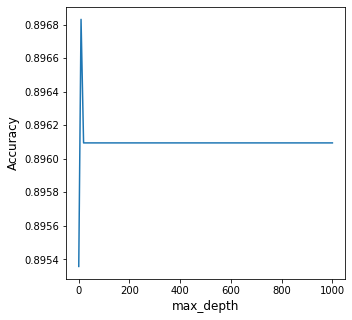

In [190]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
axes.plot(C_range, scores)
axes.set_xlabel('max_depth', fontsize = 12)
axes.set_ylabel('Accuracy', fontsize = 12);

In [191]:
max_value=max(scores)
max_index=scores.index(max_value)

print(scores)
print(max_value)
print(max_index)

[0.8953574060427414, 0.8968312453942521, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967, 0.8960943257184967,

In [192]:
# Lista de valores a probar para 'penalty'
scores = []
for pen in ['l1', 'l2']:
  log_regress = LogisticRegression(C = C_opt, penalty = pen, solver = 'liblinear', multi_class = 'ovr', max_iter = 1000, random_state = 2731)
  log_regress.fit(X_train, y_train)
  score = log_regress.score(X_test, y_test)
  scores.append(score)

In [193]:
max_value=max(scores)
max_index=scores.index(max_value)

list(zip(['l1', 'l2'], scores))
# Los resultados no sugieren diferencia entre L1 y L2

[('l1', 0.8953574060427414), ('l2', 0.8960943257184967)]

**Estimación**

In [194]:
# Estimacion
log_regress = LogisticRegression(C = C_opt, 
                                 penalty = penalty_opt, 
                                 solver = 'liblinear',
                                 random_state = 2731)

model_class(log_regress, X_train, X_test, y_train, y_test, 'Logistic Regression')


Model Report
Logistic Regression

Determination Coefficient/Precision (Train): 0.8894
Determination Coefficient/Precision (Test): 0.8954


RMSE (Train): 0.3326
RMSE (Test): 0.3235


Sensitivity (Train): 0.1890
Sensitivity (Test): 0.2051
Specificity (Train): 0.9807
Specificity (Test): 0.9850


AUC ROC (Train): 0.8584
AUC ROC (Test): 0.8791


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


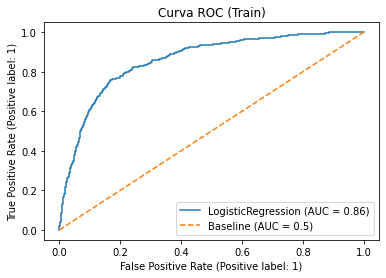

In [195]:
# Visualizar la curva ROC Train
metrics.plot_roc_curve(log_regress, X_train, y_train);
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.title('Curva ROC (Train)', fontsize = 12)
plt.legend();

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


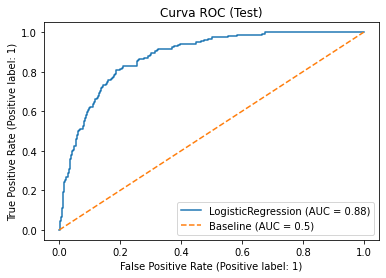

In [196]:
# Visualizar la curva ROC Test
metrics.plot_roc_curve(log_regress, X_test, y_test);
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.title('Curva ROC (Test)', fontsize = 12)
plt.legend();

Modelo de referencia

In [197]:
# Estimacion con modelo por default
log_regress_ref = LogisticRegression(random_state = 2731)

model_class(log_regress_ref, X_train, X_test, y_train, y_test, 'Logistic Regression')


Model Report
Logistic Regression

Determination Coefficient/Precision (Train): 0.8891
Determination Coefficient/Precision (Test): 0.8961


RMSE (Train): 0.3331
RMSE (Test): 0.3223


Sensitivity (Train): 0.1890
Sensitivity (Test): 0.2051
Specificity (Train): 0.9804
Specificity (Test): 0.9858


AUC ROC (Train): 0.8581
AUC ROC (Test): 0.8787


¿Qué métrica será la mejor para evaluar tu modelo de clasificación para este conjunto de datos y por qué? Sugerencia: piensa en lo que significa cada métrica en este escenario específico. ¿Qué métrica va a ayudar más al banco?

In [198]:
# En este caso, se esta interesado en que los clientes acuerden una suscripción de un depósito a plazo.
# De esta forma, se puede tomar en consideración que lo que se busca es poder detectar correctamente a 
# aquellas personas que aceptan la suscripción en relación a todas aquellas que se suscriben. Es decir, 
# se puede hacer énfasis en la sensibilidad. Por otro lado, también se busca precisión en el modelo, es decir,
# que haya una buena proporción de predicciones positivas que fueron correctas. Finalmente, también se puede
# tomar en consideración el área debajo de la curva ROC (AUC ROC) ya que brinda una idea respecto a que
# tan bien el modelo permite establecer una diferenciación entre los casos positivos y negativos.

Compara la precisión de tu modelo con el modelo de referencia. ¿Ves algún problema aquí?

In [199]:
model_class(log_regress, X_train, X_test, y_train, y_test, 'Logistic Regression')


Model Report
Logistic Regression

Determination Coefficient/Precision (Train): 0.8894
Determination Coefficient/Precision (Test): 0.8954


RMSE (Train): 0.3326
RMSE (Test): 0.3235


Sensitivity (Train): 0.1890
Sensitivity (Test): 0.2051
Specificity (Train): 0.9807
Specificity (Test): 0.9850


AUC ROC (Train): 0.8584
AUC ROC (Test): 0.8791


In [200]:
model_class(log_regress_ref, X_train, X_test, y_train, y_test, 'Logistic Regression')


Model Report
Logistic Regression

Determination Coefficient/Precision (Train): 0.8891
Determination Coefficient/Precision (Test): 0.8961


RMSE (Train): 0.3331
RMSE (Test): 0.3223


Sensitivity (Train): 0.1890
Sensitivity (Test): 0.2051
Specificity (Train): 0.9804
Specificity (Test): 0.9858


AUC ROC (Train): 0.8581
AUC ROC (Test): 0.8787


In [201]:
# Al observar las distintas métricas, no se puede observar una diferencia sustancial entre el modelo 
# que busca una optimización de los resultados con base en el ajuste de algunos parámetros y el modelo 
# de referencia que toma los valores y opciones por default de los parámetros.

¿De qué otras formas podrías mejorar este modelo?

In [202]:
# Además de poder ajustar los demás parámetros dentro del modelo, se puede optar por 
# establecer un rebalance de los casos positivos (1) frente a los negativos (0):

round(df['y_yes'].value_counts() / df.shape[0] * 100, 2)
# En este caso se puede observar que, aproximadamente, del total de clientes 
# analizados, 11.5% han decidido suscribirse a un depósito a plazo

# En este caso, posiblemente puede haber un sesgo en esta variable al haber 
# una mayor proporción de respuestas negativas.

# En este caso, se puede establecer un rebalance de esta variable, tomando en consideración una proporcion de
# 80% para respuestas negativas (0) y 20% para respuestas positivas (1) 

0    88.48
1    11.52
Name: y_yes, dtype: float64

In [203]:
# Considerar una nueva base, con una muestra aleatoria de los datos negativos para establecer una relación de:
# 80% para respuestas negativas (0) y 20% para respuestas positivas (1)

f_y0 = df['y_yes']==0
f_y1 = df['y_yes']==1

df_y0 = df[f_y0]
df_y1 = df[f_y1]

In [204]:
df['y_yes'].value_counts()

cantidad_y0 = int(round(df['y_yes'].value_counts()[1] / 0.2, 0)) - 521

In [205]:
df_y0 = df_y0.sample(n = cantidad_y0)

In [206]:
df1 = df_y0.append(df_y1, ignore_index = False)

In [207]:
round(df1['y_yes'].value_counts() / df1.shape[0] * 100, 2)
# De esta forma, se puede estimar con este conjunto de datos, al poseer un rebalance de los casos 
# negativos en relación a los positivos

0    80.0
1    20.0
Name: y_yes, dtype: float64